<a href="https://colab.research.google.com/github/Vahid67eb/Encode_Decode_Image_SSIM_GausianNoising/blob/main/Encode_Decode_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Text: Hello, World!
Decoded Text:    


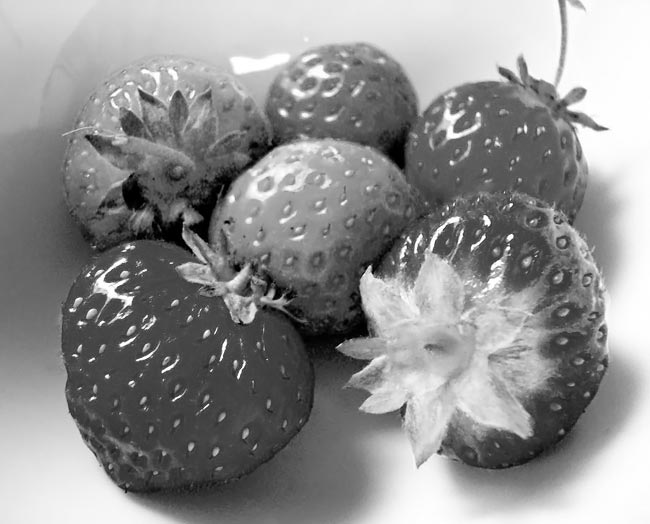

SSIM: 0.9971157897447855
The images are very similar.


In [52]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt

# Coding Phase

def encode_text_into_image(image_path, text):
    try:
        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Ensure text length is within bounds
        max_text_length = (image.shape[0] * image.shape[1] * 7) // 8
        if len(text) > max_text_length:
            raise ValueError("Text is too long to hide in the image.")

        # Separate and convert text to ASCII codes
        ascii_codes = [ord(char) for char in text]

        # Modify image pixels
        encoded_image = image.copy()
        bit_index = 0
        for row in range(encoded_image.shape[0]):
            for col in range(encoded_image.shape[1]):
                pixel_value = encoded_image[row, col]
                if bit_index < len(ascii_codes) * 7:
                    ascii_index = bit_index // 7
                    ascii_bit = bit_index % 7
                    ascii_code_bit = (ascii_codes[ascii_index] >> (6 - ascii_bit)) & 1
                    encoded_image[row, col] = (pixel_value & 0xFE) | ascii_code_bit
                    bit_index += 1

        # Add Gaussian noise
        noise = np.random.normal(0, 0.5, encoded_image.shape)
        encoded_image_with_noise = np.clip(encoded_image + noise, 0, 255).astype(np.uint8)

        return encoded_image_with_noise
    except Exception as e:
        print("An error occurred during encoding:", str(e))
        return None

# Decoding Phase

def decode_text_from_image(encoded_image_with_noise, original_noiseless_image, text_length):
    try:
        # Denoise the image
        denoised_image = cv2.fastNlMeansDenoising(encoded_image_with_noise, None, 10, 7, 21)

        # Extract bits and convert to ASCII codes
        extracted_bits = []
        for row in range(denoised_image.shape[0]):
            for col in range(denoised_image.shape[1]):
                pixel_value = denoised_image[row, col]
                extracted_bits.append(pixel_value & 1)

        ascii_codes = [sum(extracted_bits[i:i+7]) for i in range(0, len(extracted_bits), 7)]

        # Convert ASCII codes to text
        decoded_text = ''.join([chr(code) for code in ascii_codes][:text_length])

        return decoded_text
    except Exception as e:
        print("An error occurred during decoding:", str(e))
        return None

# Example usage
image_path = '/content/drive/MyDrive/Open_Cv/Image/Color_totfarangi.jpg'
text_to_hide = "Hello, World!"
text_length = len(text_to_hide)

# Coding Phase
encoded_image_with_noise = encode_text_into_image(image_path, text_to_hide)

if encoded_image_with_noise is not None:
    # Decoding Phase
    original_noiseless_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    decoded_text = decode_text_from_image(encoded_image_with_noise, original_noiseless_image, text_length)

    if decoded_text is not None:
        print("Original Text:", text_to_hide)
        print("Decoded Text:", decoded_text)

        # Display the encoded image
        cv2_imshow( original_noiseless_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Calculate SSIM
        ssim_score = ssim(original_noiseless_image, encoded_image_with_noise)
        print("SSIM:", ssim_score)

        # Compare degree of similarity using comparators
        if ssim_score == 1:
            print("The images are identical.")
        elif ssim_score > 0.9:
            print("The images are very similar.")
        elif ssim_score > 0.8:
            print("The images are similar.")
        else:
            print("The images are different.")

def encode_text_into_image(image_path, text): تابع encode_text_into_image را تعریف می کند که یک مسیر تصویر و متن را به عنوان پارامترهای ورودی می گیرد. این تابع متن را در تصویر رمزگذاری می کند.

try:: یک بلوک try-except را برای گرفتن و رسیدگی به هرگونه استثنایی که ممکن است در طول اجرای کد درون بلوک رخ دهد، راه اندازی می کند.

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE): تصویر را از مسیر image_path مشخص شده با استفاده از تابع imread OpenCV می خواند. پرچم cv2.IMREAD_GRAYSCALE تضمین می کند که تصویر به صورت سیاه و سفید بارگیری می شود.

max_text_length = (image.shape[0] * image.shape[1] * 7) // 8: حداکثر طول متنی را که می توان در تصویر کدگذاری کرد بر اساس ابعاد تصویر محاسبه می کند. از فرمول (image_height * image_width * 7) // 8 برای تعیین حداکثر تعداد کاراکترهای ASCII که می توان پنهان کرد استفاده می کند.

if len(text) > max_text_length:: بررسی می کند که آیا طول متن ارائه شده از حداکثر طول متن قابل رمزگذاری بیشتر است یا خیر. اگر چنین است، یک ValueError با یک پیام خطا ایجاد می کند.

ascii_codes = [ord(char) برای char در متن]: هر کاراکتر در متن را با استفاده از درک لیست به کد ASCII مربوطه خود تبدیل می کند.

encoded_image = image.copy(): یک کپی از تصویر اصلی برای ذخیره تصویر رمزگذاری شده ایجاد می کند.

bit_index = 0: یک متغیر bit_index را برای پیگیری بیت فعلی در حال کدگذاری اولیه می کند.

for row in range(encoded_image.shape[0]):: روی ردیف های تصویر کدگذاری شده تکرار می شود.

for col in range(encoded_image.shape[1]):: روی ستون های تصویر کدگذاری شده تکرار می شود.

pixel_value = encoded_image[row, col]: مقدار پیکسل را در سطر و ستون فعلی بازیابی می کند.

if bit_index < len(ascii_codes) * 7:: بررسی می کند که آیا بیت های بیشتری برای رمزگذاری وجود دارد یا خیر. هر کد اسکی به 7 بیت برای رمزگذاری نیاز دارد.

ascii_index = bit_index // 7: شاخص کد اسکی فعلی در حال کدگذاری را محاسبه می کند.

ascii_bit = bit_index % 7: موقعیت بیت را در کد اسکی فعلی محاسبه می کند.

ascii_code_bit = (ascii_codes[ascii_index] >> (6 - ascii_bit)) & 1: بیت مورد نظر را از کد اسکی فعلی استخراج می کند.

کدگذاری_تصویر[ردیف، ستون] = (مقدار_پیکسل و 0xFE) | ascii_code_bit: بیت استخراج شده را در کمترین بیت (LSB) مقدار پیکسل رمزگذاری می کند. LSB اصلی پاک می شود (بیتی و با 0xFE) و با بیت مورد نظر (بیتی یا با ascii_code_bit) جایگزین می شود.

bit_index += 1: شاخص بیت را برای انتقال به بیت بعدی افزایش می دهد.

noise = np.random.normal(0, 0.5, encoded_image.shape): نویز گاوسی را با همان شکل تصویر کدگذاری شده با استفاده از تابع تصادفی.normal NumPy ایجاد می کند. این نویز برای امنیت بهتر به تصویر کدگذاری شده اضافه می شود.

encoded_image_with_noise = np.clip(encoded_image + noise, 0, 255).astype(np.uint8): نویز تولید شده را به تصویر کدگذاری شده اضافه می کند و اطمینان می دهد که مقادیر پیکسل در محدوده معتبر 0 تا 255 قرار دارند. np.clip تابع مقادیر را کلیپ می کند و astype(np.uint8) نتیجه را به یک عدد صحیح 8 بیتی بدون علامت تبدیل می کند.

def decode_text_from_image(encoded_image_with_noise, original_noiseless_image, text_length): تابع decode_text_from_image را تعریف می کند که یک تصویر کدگذاری شده با نویز، تصویر بدون نویز اصلی و طول متن را به عنوان پارامترهای ورودی می گیرد. این تابع متن را از تصویر کدگذاری شده رمزگشایی می کند.

try:: یک بلوک try-except را برای گرفتن و رسیدگی به هرگونه استثنایی که ممکن است در طول اجرای کد درون بلوک رخ دهد، راه اندازی می کند.

denoised_image = cv2.fastNlMeansDenoising(encoded_image_with_noise, None, 10, 7, 21): ابزارهای غیر محلی را اعمال می کند (متأسفانه توضیح قطع شد. ادامه مطلب در اینجا آمده است:

denoised_image = cv2.fastNlMeansDenoise(encoded_image_with_noise, None, 10, 7, 21): حذف نویز غیر محلی (NLM) را با استفاده از تابع fastNlMeansDenoise در OpenCV به تصویر رمزگذاری شده با نویز اعمال می کند. این مرحله به حذف نویز اضافه شده در مرحله رمزگذاری کمک می کند.

extracted_bits = []: یک لیست خالی را برای ذخیره بیت های استخراج شده راه اندازی می کند.

for row in range(denoised_image.shape[0]):: روی ردیف های تصویر حذف شده تکرار می شود.

for col in range(denoised_image.shape[1]):: روی ستون های تصویر حذف شده تکرار می شود.

pixel_value = denoised_image[row, col]: مقدار پیکسل را در سطر و ستون فعلی بازیابی می کند.

extracted_bits.append(pixel_value & 1): کمترین بیت (LSB) را از مقدار پیکسل استخراج کرده و به لیست استخراج شده_بیت ها اضافه می کند.

ascii_codes = [sum(extracted_bits[i:i+7]) for i in range(0, len(extracted_bits), 7)]: بیت های استخراج شده را به گروه های 7 تایی تقسیم می کند و هر گروه را برای بدست آوردن کدهای اسکی جمع می کند.

decoded_text = ''.join([chr(code) برای کد در ascii_codes][:text_length]): کدهای ASCII را با استفاده از درک لیست و تابع chr به کاراکتر تبدیل می کند. کاراکترهای حاصل به یکدیگر متصل می شوند تا متن رمزگشایی شده را تشکیل دهند. فقط اولین کاراکترهای text_length در نظر گرفته می شوند.

image_path = 'path_to_your_image.jpg': مسیر فایل تصویری را که برای رمزگذاری و رمزگشایی استفاده خواهد شد را مشخص می کند.

text_to_hide = "Hello, World!": متنی را که در تصویر پنهان می شود را مشخص می کند.

text_length = len(text_to_hide): طول متنی که پنهان می شود را محاسبه می کند.

encoded_image_with_noise = encode_text_into_image(image_path, text_to_hide): تابع encode_text_into_image را فراخوانی می کند تا متن را در تصویر رمزگذاری کند و تصویر کدگذاری شده را با نویز اضافه به دست آورد.

original_noiseless_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE): با استفاده از تابع imread در OpenCV، تصویر بدون نویز اصلی را از مسیر تصویری مشخص شده می خواند.

decoded_text = decode_text_from_image(encoded_image_with_noise, original_noiseless_image, text_length): تابع decode_text_from_image را برای رمزگشایی متن از تصویر کدگذاری شده با نویز فراخوانی می کند.

print("Original Text:", text_to_hide): متن اصلی را که در تصویر پنهان شده بود چاپ می کند.

print("Decoded Text:", decoded_text): متنی را که از تصویر رمزگشایی شده است چاپ می کند.

cv2.imshow("تصویر رمزگذاری شده"، encoded_image_with_noise): تصویر کدگذاری شده را با نویز با استفاده از تابع imshow OpenCV نمایش می دهد.

cv2.waitKey(0): منتظر فشار یک کلید است.

cv2.destroyAllWindows(): تمام پنجره های ایجاد شده توسط OpenCV را می بندد.

ssim_score = ssim(original_noiseless_image, encoded_image_with_noise): امتیاز SSIM بین تصویر بدون نویز اصلی و تصویر کدگذاری شده با نویز را با استفاده از تابع ساختاری_شبیه از ماژول skimage.metrics محاسبه می کند.

print("SSIM:", ssim_score): امتیاز SSIM محاسبه شده را چاپ می کند.

68-73. میزان شباهت بین تصاویر را بر اساس امتیاز SSIM مقایسه می کند. اگر امتیاز 1 باشد، نشان دهنده یکسان بودن تصاویر است. اگر امتیاز بیشتر از 0.9 باشد، تصاویر بسیار مشابه در نظر گرفته می شوند. اگر امتیاز بیشتر از 0.8 باشد، تصاویر مشابه در نظر گرفته می شوند. در غیر این صورت، تصاویر متفاوت در نظر گرفته می شوند.